# Title

In [1]:
import os
# import json
import numpy as np
import pandas as pd
from scipy import stats
# from pandas.io.json import json_normalize
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import missingno as msno

from funs import utils
from funs import generalutils
from funs import viz

%load_ext autoreload
%autoreload 2

source for this function:  
https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields


#https://gist.github.com/ruxi/ff0e9255d74a3c187667627214e1f5fa

#__author__  = "lewis.r.liu@gmail.com"
#__copyright__ = "Copyright 2018, github.com/ruxi"
#__license__ = "MIT"
#__version__ = 0.0.1

# update: Mar 5 , 2018
# created: Feb 19, 2018
# desc: seaborn jointplot with 'hue'
# prepared for issue: https://github.com/mwaskom/seaborn/issues/365

"""
jointplots with hue groupings.
minimum working example
-----------------------
iris = sns.load_dataset("iris")
jointplot_w_hue(data=iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')['fig']
changelog
---------
2018 Mar 5: added legends and colormap
2018 Feb 19: gist made
"""

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

sns.set_style('darkgrid')
def jointplot_w_hue(data, x, y, hue=None, colormap = None, 
                    figsize = None, fig = None, scatter_kws=None):
    #defaults
    if colormap is None:
        colormap = sns.color_palette() #['blue','orange']
    if figsize is None:
        figsize = (5,5)
    if fig is None:
        fig  = plt.figure(figsize = figsize)
    if scatter_kws is None:
        scatter_kws = dict(alpha=0.4, lw=1)
        
    # derived variables
    if hue is None:
        return "use normal sns.jointplot"
    hue_groups = data[hue].unique()

    subdata = dict()
    colors = dict()
    
    active_colormap = colormap[0: len(hue_groups)]
    legend_mapping = []
    for hue_grp, color in zip(hue_groups, active_colormap):
        legend_entry = mpatches.Patch(color=color, label=hue_grp)
        legend_mapping.append(legend_entry)
        
        subdata[hue_grp] = data[data[hue]==hue_grp]
        colors[hue_grp] = color
        
    # canvas setup
    grid = gridspec.GridSpec(2, 2,
                           width_ratios=[4, 1],
                           height_ratios=[1, 4],
                           hspace = 0, wspace = 0
                           )
    ax_main    = plt.subplot(grid[1,0])
    ax_xhist   = plt.subplot(grid[0,0], sharex=ax_main)
    ax_yhist   = plt.subplot(grid[1,1])#, sharey=ax_main)
    
    ## plotting
   
    # histplot x-axis
    for hue_grp in hue_groups:
        sns.distplot(subdata[hue_grp][x], color = colors[hue_grp]
                     , ax = ax_xhist)

    # histplot y-axis
    for hue_grp in hue_groups:
        sns.distplot(subdata[hue_grp][y], color = colors[hue_grp]
                     , ax = ax_yhist, vertical=True) 

    # main scatterplot 
    # note: must be after the histplots else ax_yhist messes up
    for hue_grp in hue_groups:
        sns.regplot(data = subdata[hue_grp], fit_reg=False,
                    x = x, y = y, ax = ax_main, color = colors[hue_grp]
                    , scatter_kws=scatter_kws
                   )        
        
    # despine
    for myax in [ax_yhist, ax_xhist]:
        sns.despine(ax = myax, bottom=False, top=True, left = False, right = True
                    , trim = False)
        plt.setp(myax.get_xticklabels(), visible=False)
        plt.setp(myax.get_yticklabels(), visible=False)
    
    
    # topright 
    ax_legend   = plt.subplot(grid[0,1])#, sharey=ax_main)
    plt.setp(ax_legend.get_xticklabels(), visible=False)
    plt.setp(ax_legend.get_yticklabels(), visible=False)

    ax_legend.legend(handles=legend_mapping)
    plt.close()
    
    return dict(fig = fig, gridspec = grid)

def print_iteration_2col(text1, text2, leftWidth=40, rightWidth=15):
    print(text1.ljust(leftWidth, '.') + text2.rjust(rightWidth))

def bold(s):
    return '\033[1m'  + s + '\033[0m'
def bold_red(s):
    return '\x1b[1;31m' + s + '\x1b[0m'

def load_df(csv_path, nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

print(os.listdir("./data/all"))

%%time
#train_df = utils.load_df('./data/all/train.csv')   # Loaded train.csv. Shape: (903'653, 55)   ~9min 24s
test_df = utils.load_df("./data/all/test.csv")     # Loaded test.csv. Shape: (804684, 53)

# Surface Pro: time to load  ~14min 47s
# Home PC:     time to load  ~ 5min 43s

#train_df.to_csv('./data/train_to_load.csv')

#test_df.to_csv('./data/test_to_load.csv')

In [2]:
%%time
LOAD_MODUS = 'json_done'  # options:    json_done   original_data
train_df, test_df = utils.load_df_w_modus()

D:\Programs\Anaconda3\lib\site-packages\IPython\core\magic.py:188: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


Wall time: 18.5 s


def load_df_w_modus(LOAD_MODUS = 'json_done'):
    if LOAD_MODUS == 'original_data':
        train_df = load_df('./data/all/train.csv')   # Loaded train.csv. Shape: (903'653, 55)   ~9min 24s
        test_df  = load_df("./data/all/test.csv")     # Loaded test.csv. Shape: (804684, 53)
    elif LOAD_MODUS == 'json_done':
        train_df = pd.read_csv('./data/train_to_load.csv')
        test_df  = pd.read_csv('./data/test_to_load.csv')
    return train_df, test_df

In [3]:
train_df.name = 'train_df'
test_df.name = 'test_df'

datasets = [train_df, test_df]

## Value Counts - Remove Columns with no Information

In [4]:
cat_cols = [col for col in train_df.columns if (train_df[col].dtype=='object') ]

In [5]:
# train_df[cat_cols].isnull().sum()
# train_df[cat_cols].shape
# train_df[cat_cols].nunique()

In [6]:
# columns with nunique()==1
col_nunique_1 = [col for col in train_df.columns if train_df[col].nunique()==1]

In [7]:
# col_to_remove comes from nunique() == 1

for col in col_nunique_1:
    # if set(['not available in demo dataset']) ==  set(train_df[col].unique()): continue
    print(generalutils.bold(col), train_df[col].dtypes, train_df[col].unique())

socialEngagementType object ['Not Socially Engaged']
device.browserSize object ['not available in demo dataset']
device.browserVersion object ['not available in demo dataset']
device.flashVersion object ['not available in demo dataset']
device.language object ['not available in demo dataset']
device.mobileDeviceBranding object ['not available in demo dataset']
device.mobileDeviceInfo object ['not available in demo dataset']
device.mobileDeviceMarketingName object ['not available in demo dataset']
device.mobileDeviceModel object ['not available in demo dataset']
device.mobileInputSelector object ['not available in demo dataset']
device.operatingSystemVersion object ['not available in demo dataset']
device.screenColors object ['not available in demo dataset']
device.screenResolution object ['not available in demo dataset']
geoNetwork.cityId object ['not available in demo dataset']
geoNetwork.latitude object ['not available in demo dataset']
geoNetwork.longitude object ['not available in 

In [8]:
col_to_remove_bc_not_available = [col for col in col_nunique_1 if set(['not available in demo dataset'])==set(train_df[col].unique())]

In [9]:
print(generalutils.bold_red('nunique()  isnull().sum()  unique()                col\n'))

for col in col_to_remove_bc_not_available:
    print(train_df[col].nunique(), '  ', train_df[col].isnull().sum(), '  ', train_df[col].unique(), '   ', generalutils.bold(col))

nunique()  isnull().sum()  unique()                col

1    0    ['not available in demo dataset']     device.browserSize
1    0    ['not available in demo dataset']     device.browserVersion
1    0    ['not available in demo dataset']     device.flashVersion
1    0    ['not available in demo dataset']     device.language
1    0    ['not available in demo dataset']     device.mobileDeviceBranding
1    0    ['not available in demo dataset']     device.mobileDeviceInfo
1    0    ['not available in demo dataset']     device.mobileDeviceMarketingName
1    0    ['not available in demo dataset']     device.mobileDeviceModel
1    0    ['not available in demo dataset']     device.mobileInputSelector
1    0    ['not available in demo dataset']     device.operatingSystemVersion
1    0    ['not available in demo dataset']     device.screenColors
1    0    ['not available in demo dataset']     device.screenResolution
1    0    ['not available in demo dataset']     geoNetwork.cityId
1    0    ['no

In [10]:
# removing columns

print(generalutils.bold_red('removing   col_to_remove_bc_not_available'))
print('train_df / test_df shape -beore- : ', train_df.shape, ' / ', test_df.shape)
for data in datasets:
    data.drop(col_to_remove_bc_not_available, axis=1, inplace=True)
print('train_df / test_df shape -after- : ', train_df.shape, ' / ', test_df.shape)

removing   col_to_remove_bc_not_available
train_df / test_df shape -beore- :  (903653, 56)  /  (804684, 54)
train_df / test_df shape -after- :  (903653, 39)  /  (804684, 37)


In [11]:
# removing columns only existing in train_df
train_df.drop('trafficSource.campaignCode', axis=1, inplace=True)

In [12]:
# update col list
# columns with nunique()==1
col_nunique_1 = [col for col in train_df.columns if train_df[col].nunique()==1]

In [13]:
# Hygiene:
# del col_to_remove_bc_not_available

In [14]:
col_not_to_remove = [ele for ele in col_nunique_1 if ele not in col_to_remove_bc_not_available]

In [15]:
train_df[col_not_to_remove].apply(lambda x: x.value_counts() / train_df.shape[0])

D:\Programs\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
D:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:7383: RuntimeWarning: '<' not supported between instances of 'str' and 'bool', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
D:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:7383: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


,socialEngagementType,totals.bounces,totals.newVisits,totals.visits,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect
Not Socially Engaged,1.0,NaN,NaN,NaN,NaN,NaN
1.0,NaN,0.498676,0.77802,1.0,NaN,0.303219
False,NaN,NaN,NaN,NaN,0.023748,NaN


In [16]:
for col in col_not_to_remove:
    print(generalutils.bold_red(col))
    for data in datasets:
        print(generalutils.bold_red(data.name))
        generalutils.print_iteration_2col(text1='How many NaN\'s:  ', text2=str(data[col].isnull().sum()))
        generalutils.print_iteration_2col(text1='How many NaN\'s in %:  ', text2=str('{0:.3f} %'.format(data[col].isnull().sum() / data.shape[0]*100)))
        generalutils.print_iteration_2col(text1='how many nunique:  ', text2=str(data[col].nunique()))
        print()


socialEngagementType
train_df
How many NaN's:  .......................              0
How many NaN's in %:  ..................        0.000 %
how many nunique:  .....................              1

test_df
How many NaN's:  .......................              0
How many NaN's in %:  ..................        0.000 %
how many nunique:  .....................              1

totals.bounces
train_df
How many NaN's:  .......................         453023
How many NaN's in %:  ..................       50.132 %
how many nunique:  .....................              1

test_df
How many NaN's:  .......................         383736
How many NaN's in %:  ..................       47.688 %
how many nunique:  .....................              1

totals.newVisits
train_df
How many NaN's:  .......................         200593
How many NaN's in %:  ..................       22.198 %
how many nunique:  .....................              1

test_df
How many NaN's:  .......................         20

In [17]:
# Before
train_df[col_not_to_remove].apply(lambda x: x.value_counts())

D:\Programs\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
D:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:7383: RuntimeWarning: '<' not supported between instances of 'str' and 'bool', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
D:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:7383: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


,socialEngagementType,totals.bounces,totals.newVisits,totals.visits,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect
Not Socially Engaged,903653.0,NaN,NaN,NaN,NaN,NaN
1.0,NaN,450630.0,703060.0,903653.0,NaN,274005.0
False,NaN,NaN,NaN,NaN,21460.0,NaN


In [18]:
for data in datasets:
    
    # socialEngagementType: 
    #   isnull().sum() == 0
    #   nunique() == 1
    #   100% "Not Socially Engaged"
    data.drop(['socialEngagementType'], axis=1, inplace=True)
    
    # totals.bounces
    #   isnull().sum() == 453'023
    #   nunique() == 1
    #   50% 1
    data['totals.bounces'].fillna('0', inplace=True)
    data['totals.bounces'] = data['totals.bounces'].astype(int)
    
    # totals.newVisits
    #   isnull().sum() == 200'593
    #   nunique() == 1
    #   77.8% 1
    data['totals.newVisits'].fillna('0', inplace=True)
    data['totals.newVisits'] = data['totals.newVisits'].astype(int)
    
    # totals.visits
    #   isnull().sum() == 0
    #   nunique() == 1
    #   100% 1
    data.drop(['totals.visits'], axis=1, inplace=True)
    
    # trafficSource.adwordsClickInfo.isVideoAd
    #   isnull().sum() == 882'193
    #   nunique() == 1
    #   2.4% False
    data['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True)
    data['trafficSource.adwordsClickInfo.isVideoAd'] = data['trafficSource.adwordsClickInfo.isVideoAd'].astype(bool)
    
    # trafficSource.campaignCode
    #   isnull().sum() == 903'652    remember: total records is 903'653
    #   nunique() == 1
    #   0.0001% 11251kjhkvahf
    # data.drop(['trafficSource.campaignCode'], axis=1, inplace=True)
    
    # trafficSource.isTrueDirect
    #   isnull().sum() == 629'648
    #   nunique() == 1
    #   30.3% True
    data['trafficSource.isTrueDirect'].fillna(False, inplace=True)
    data['trafficSource.isTrueDirect'] = data['trafficSource.isTrueDirect'].astype(bool)

In [19]:
[col for col in col_not_to_remove if col in train_df.columns]

['totals.bounces',
 'totals.newVisits',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.isTrueDirect']

In [20]:
# After
train_df[[col for col in col_not_to_remove if col in train_df.columns]].apply(lambda x: x.value_counts())

,totals.bounces,totals.newVisits,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.isTrueDirect
0,453023,200593,21460,629648
False,453023,200593,21460,629648
1,450630,703060,882193,274005
True,450630,703060,882193,274005


In [21]:
# Hygiene




In [22]:
test_df

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,1508151024,2,1508151024,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,1508175522,1,1508175522,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google
2,2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,1508143220,1,1508143220,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google
3,3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,1508193530,1,1508193530,Safari,mobile,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google
4,4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,1508217442,1,1508217442,Safari,desktop,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google
5,5,Organic Search,20171016,4133039884103392367,4133039884103392367_1508186358,1508186358,1,1508186358,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google
6,6,Organic Search,20171016,4320478850207397557,4320478850207397557_1508203650,1508203650,1,1508203650,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google
7,7,Organic Search,20171016,5876438247590157131,5876438247590157131_1508184397,1508184397,1,1508184397,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google
8,8,Organic Search,20171016,0514591268737702944,0514591268737702944_1508189652,1508189652,6,1508189652,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),True,(not provided),organic,NaN,google
9,9,Organic Search,20171016,6430567031531677212,6430567031531677212_1508175502,1508175502,1,1508175502,Chrome,desktop,...,NaN,True,NaN,NaN,(not set),False,(not provided),organic,NaN,google


## Missing Data

In [23]:
col_w_nan_train = [col for col in train_df.columns if train_df[col].isnull().sum()>0]
col_w_nan_test = [col for col in test_df.columns if test_df[col].isnull().sum()>0]

In [24]:
for col in col_w_nan_train:
    print(generalutils.bold_red(col))
    print(generalutils.bold_red(train_df.name))
    generalutils.print_iteration_2col(text1='How many NaN\'s:  ', text2=str(train_df[col].isnull().sum()))
    generalutils.print_iteration_2col(text1='How many nunique:  ', text2=str(train_df[col].nunique()))

print()

for col in col_w_nan_test:
    print(generalutils.bold_red(col))
    print(generalutils.bold_red(test_df.name))
    generalutils.print_iteration_2col(text1='How many NaN\'s:  ', text2=str(test_df[col].isnull().sum()))
    generalutils.print_iteration_2col(text1='How many nunique:  ', text2=str(test_df[col].nunique()))

totals.pageviews
train_df
How many NaN's:  .......................            100
How many nunique:  .....................            213
totals.transactionRevenue
train_df
How many NaN's:  .......................         892138
How many nunique:  .....................           5332
trafficSource.adContent
train_df
How many NaN's:  .......................         892707
How many nunique:  .....................             44
trafficSource.adwordsClickInfo.adNetworkType
train_df
How many NaN's:  .......................         882193
How many nunique:  .....................              2
trafficSource.adwordsClickInfo.gclId
train_df
How many NaN's:  .......................         882092
How many nunique:  .....................          17774
trafficSource.adwordsClickInfo.page
train_df
How many NaN's:  .......................         882193
How many nunique:  .....................              8
trafficSource.adwordsClickInfo.slot
train_df
How many NaN's:  .......................    

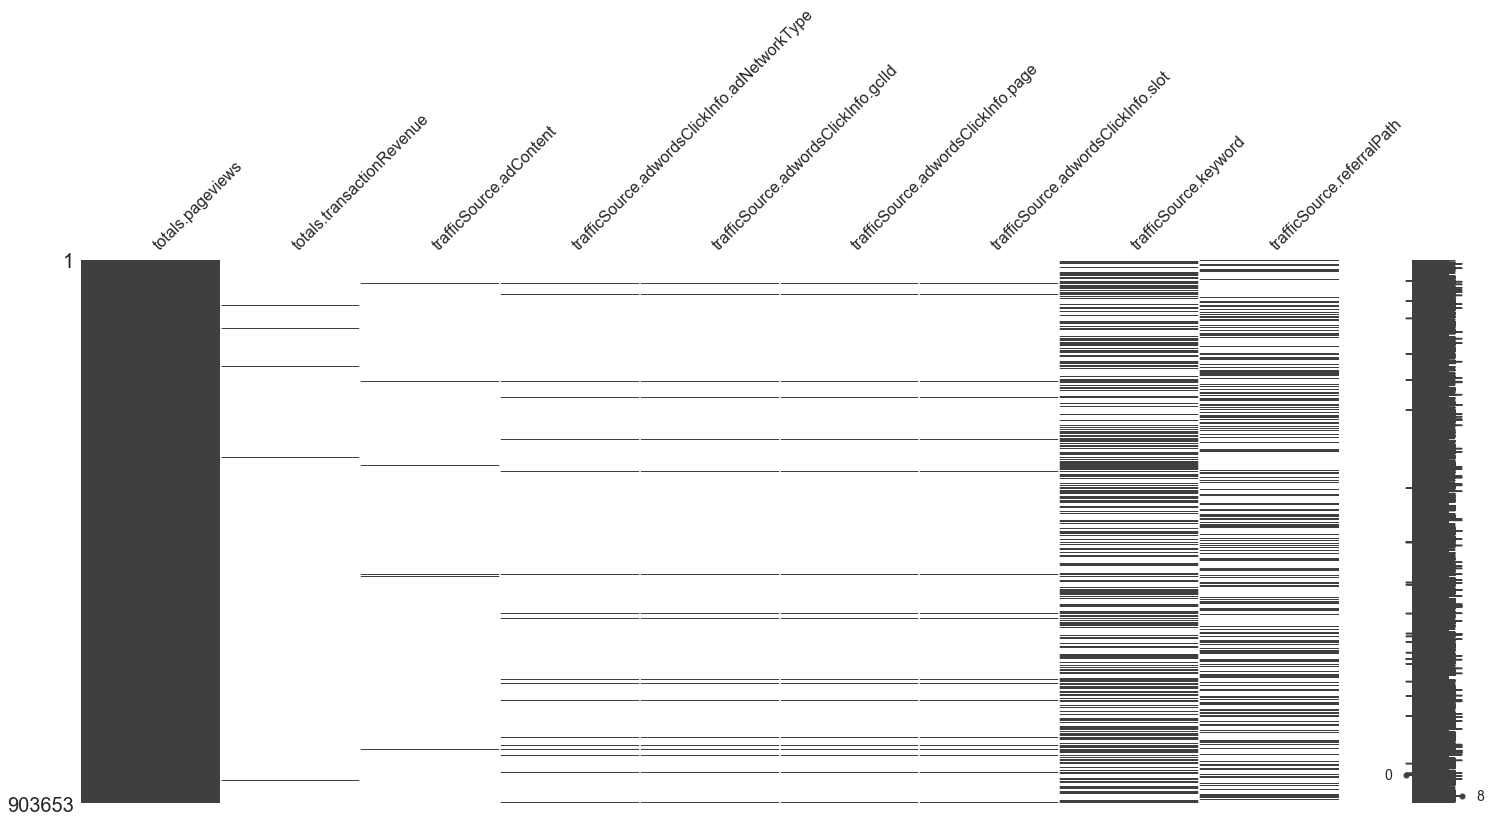

In [25]:
msno.matrix(train_df[col_w_nan_train]);

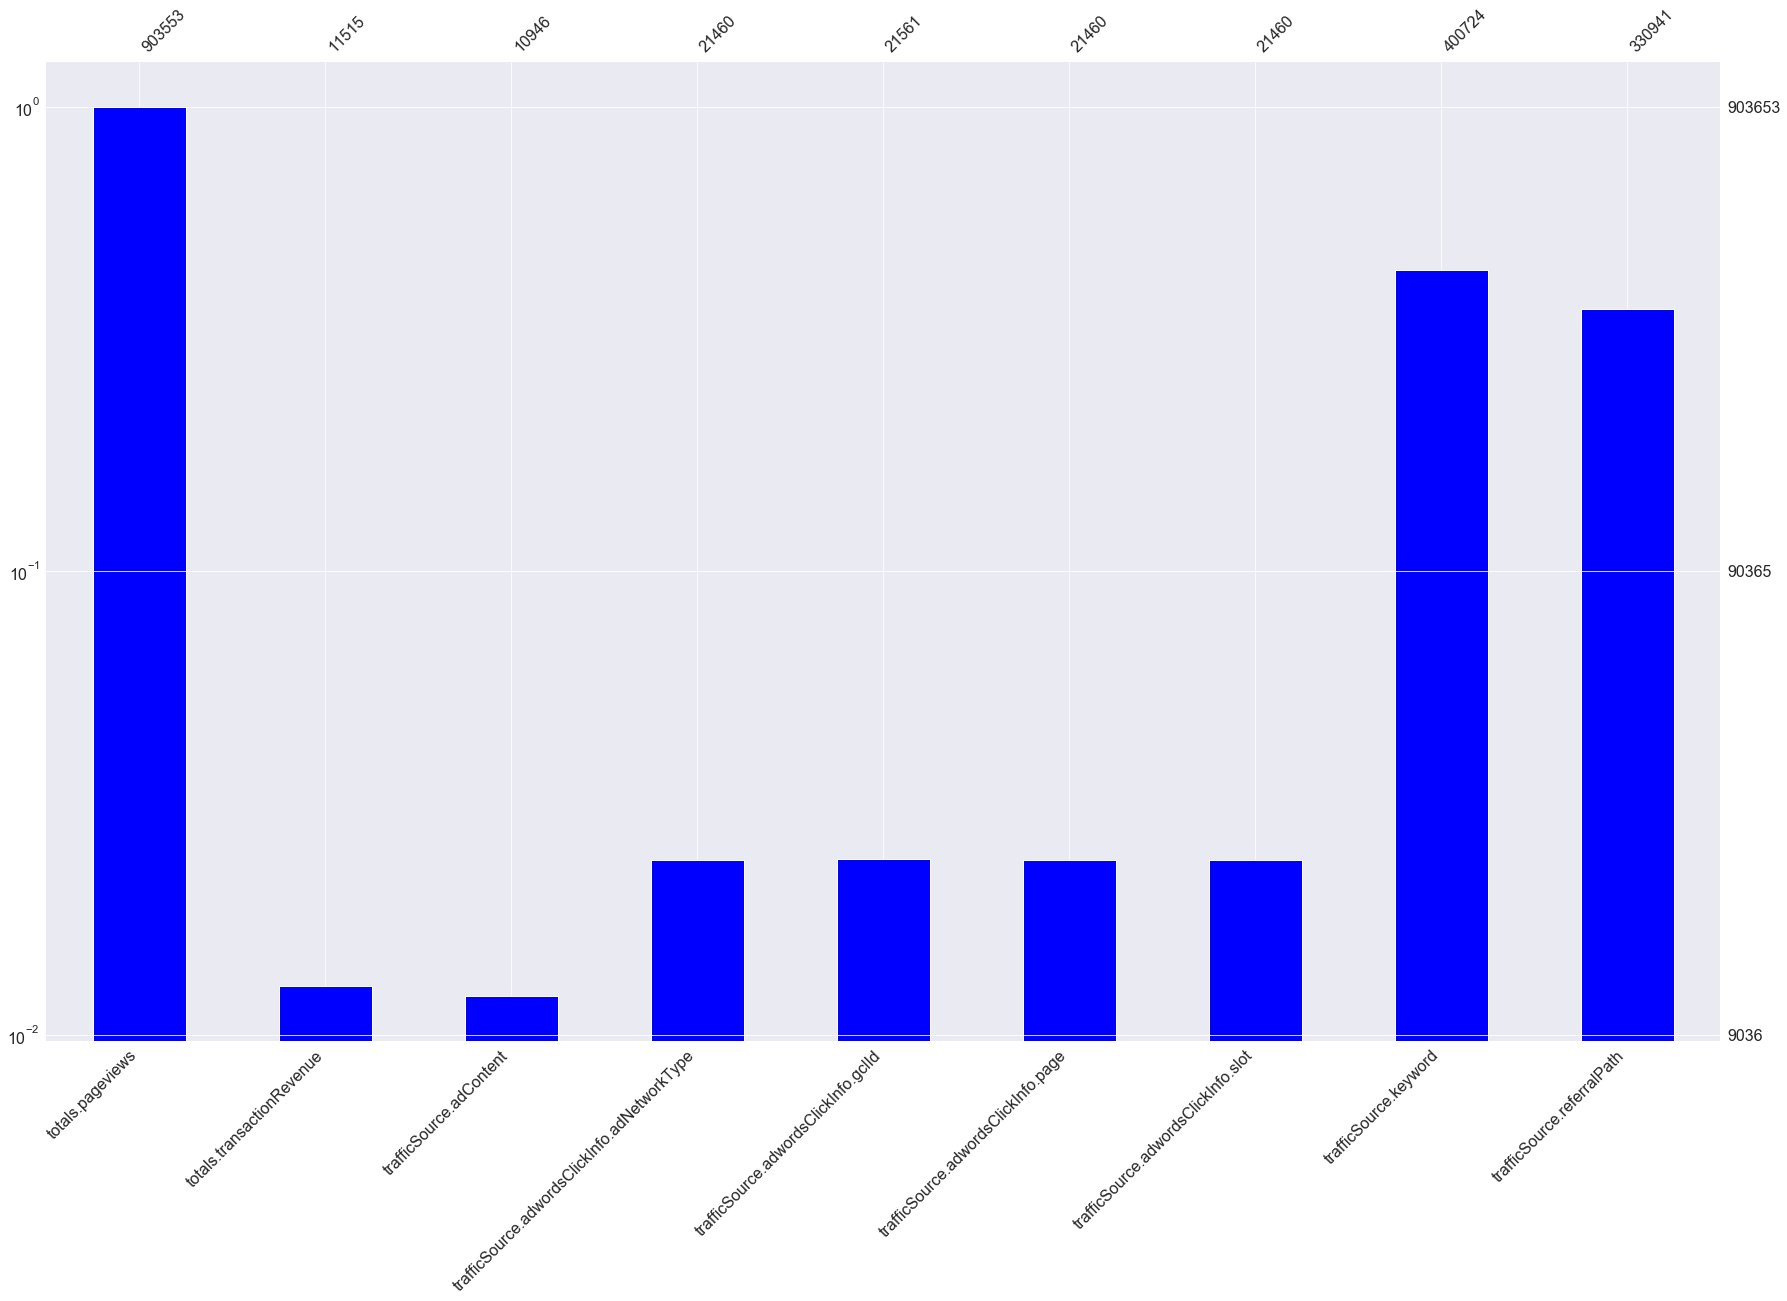

In [26]:
msno.bar(train_df[col_w_nan_train], color="blue", log=True, figsize=(30,18));

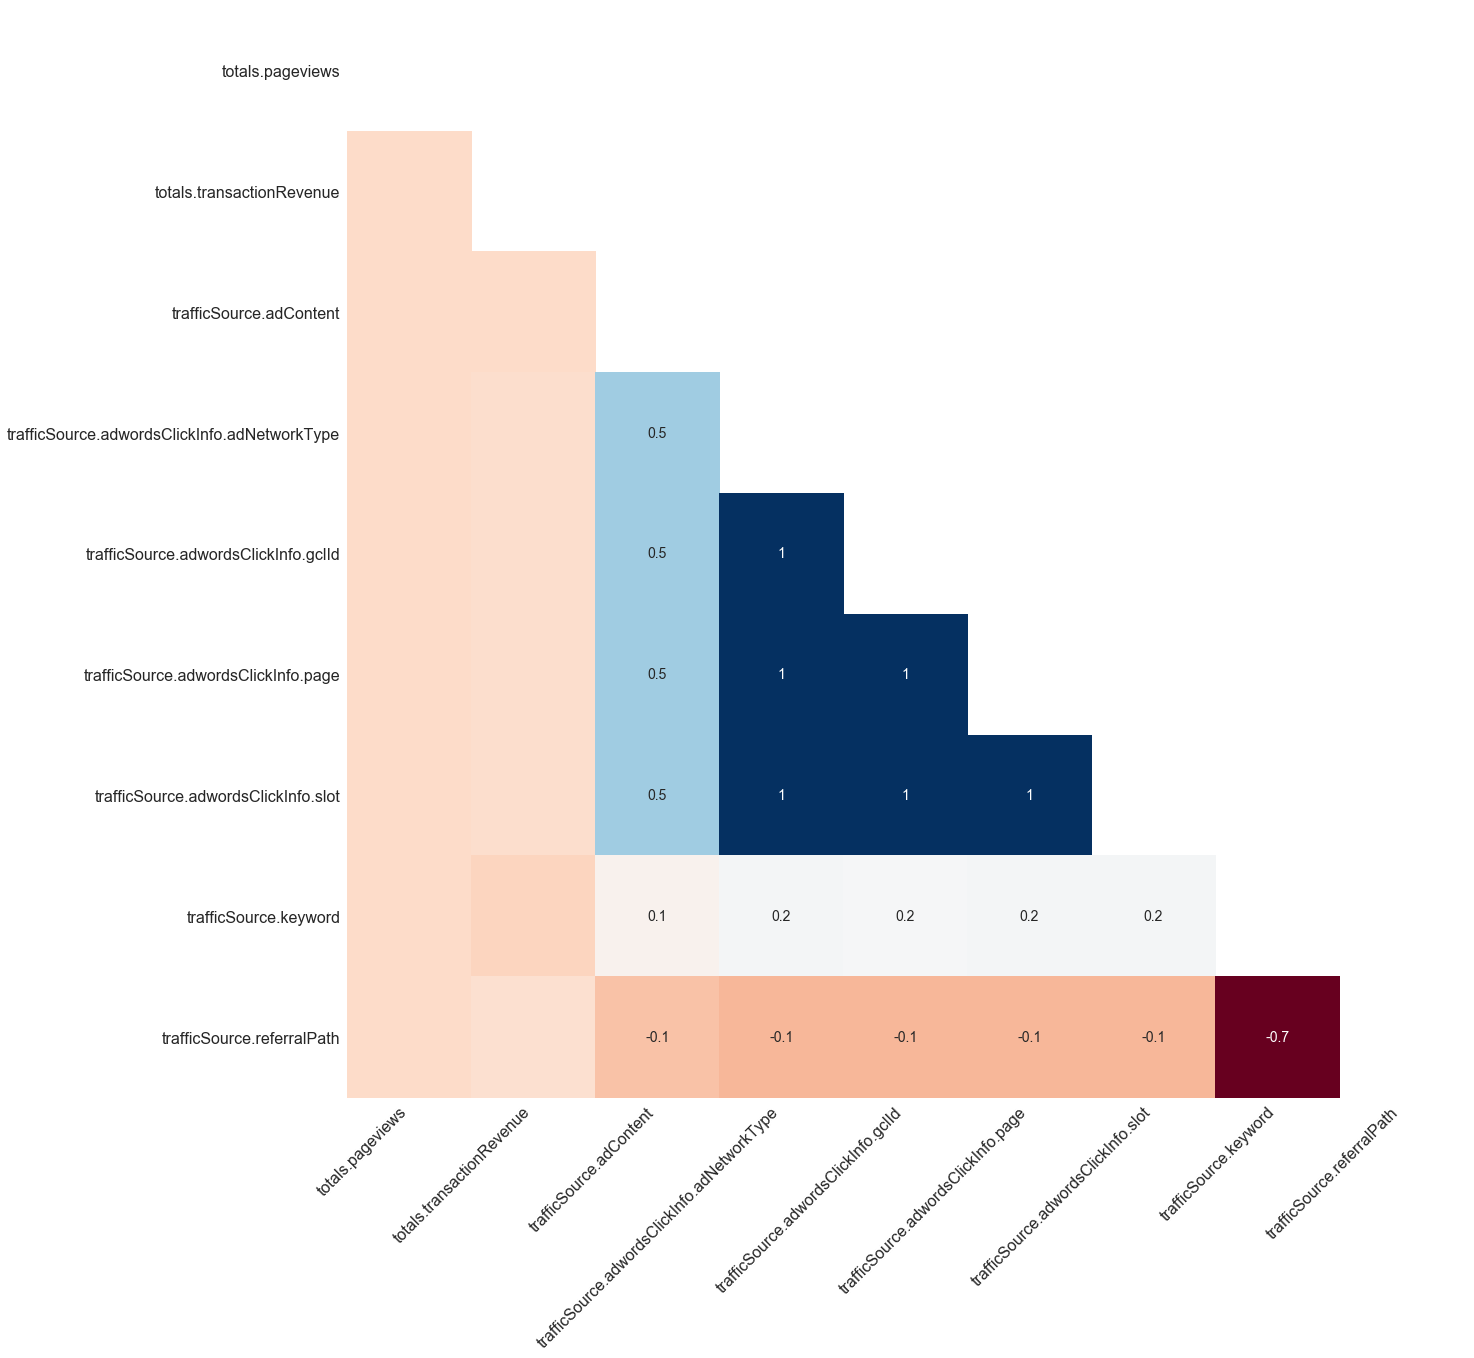

In [27]:
msno.heatmap(train_df[col_w_nan_train], figsize=(20,20));

to do:  
- **trafficSource.adContent**:  look at value_counts() and make groups (??)  
- **trafficSource.keyword**:  look at value_counts(): (1) regex (2) nan_value zusammen tun mit (not provided)  
- **trafficSource.referralPath**:  look at value_counts(): regex ...extract language?

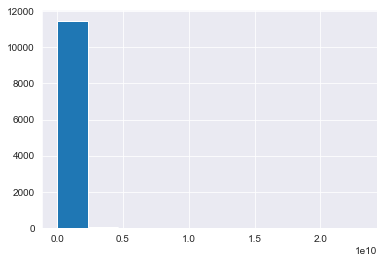

In [28]:
train_df['totals.transactionRevenue'].hist();

In [29]:
for data in datasets:
    
    # totals.pageviews
    data['totals.pageviews'].fillna('0', inplace=True)
    data['totals.pageviews'] = data['totals.pageviews'].astype(int)
    
    # totals.transactionRevenue
    if data.name == 'train_df':
        print('*** totals.transactionRevenue')
        data['totals.transactionRevenue'] = data['totals.transactionRevenue'].astype(float)
        data['totals.transactionRevenue'] = data['totals.transactionRevenue'].fillna(0)
        data['totals.transactionRevenue_log1p'] = np.log1p(data['totals.transactionRevenue'])  # PredictedLogRevenue
    
    # trafficSource.adContent
    data['trafficSource.adContent'].fillna('nan_value', inplace=True)
    
    # trafficSource.adwordsClickInfo.adNetworkType
    data['trafficSource.adwordsClickInfo.adNetworkType'].fillna('nan_value', inplace=True)
    
    # trafficSource.adwordsClickInfo.gclId
    data['trafficSource.adwordsClickInfo.gclId'].fillna('nan_value', inplace=True)
    
    # trafficSource.adwordsClickInfo.page
    data['trafficSource.adwordsClickInfo.page'].fillna('0', inplace=True)
    data['trafficSource.adwordsClickInfo.page'] = data['trafficSource.adwordsClickInfo.page'].astype(int)
    
    # trafficSource.adwordsClickInfo.slot
    data['trafficSource.adwordsClickInfo.slot'].fillna('nan_value', inplace=True)
    
    # trafficSource.keyword
    data['trafficSource.keyword'].fillna('nan_value', inplace=True)
    
    # trafficSource.referralPath
    data['trafficSource.referralPath'].fillna('nan_value', inplace=True)
    

*** totals.transactionRevenue


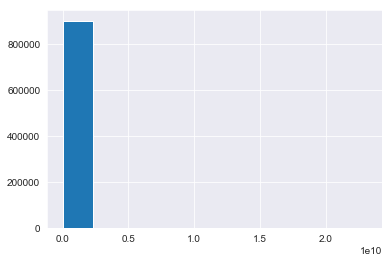

In [30]:
train_df['totals.transactionRevenue'].hist();

In [31]:
# check: 
for data in datasets:
    print(generalutils.bold_red(data.name), '  - How many NaN\'s left: ', data.isnull().sum().sum())

train_df   - How many NaN's left:  0
test_df   - How many NaN's left:  0


In [32]:
# Hygiene




In [33]:
test_df['fullVisitorId'].nunique()  # We expect the solution file to have 617242 prediction rows. 

617242

## Date Columns - Reformatting

to do:  
- **date**  
- **visitStartTime**

In [34]:
def preprocess_date(datasets, add_feat_eng=True):
    for data in datasets:
        data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
        
        if add_feat_eng:
            data['date_YEAR'] = data['date'].dt.year
            data['date_MONTH'] = data['date'].dt.month
            data['date_DAY']   = data['date'].dt.day
            data['date_WEEKDAY'] = data['date'].dt.weekday
            data['date_WEEKOFYEAR'] = data['date'].dt.weekofyear
            
            # add unique users / day
            data['unique_users_per_date_DAY'] = data.groupby('date_DAY')['fullVisitorId'].transform('nunique')
            # add unique users / weekday
            data['unique_users_per_date_WEEKDAY'] = data.groupby('date_WEEKDAY')['fullVisitorId'].transform('nunique')
            # add unique users / month
            data['unique_users_per_date_MONTH'] = data.groupby('date_MONTH')['fullVisitorId'].transform('nunique')
    return datasets

In [35]:
def preprocess_visitStartTime(datasets, add_feat_eng=True):
    for data in datasets:
        data['visitStartTime_asTimeStamp'] = data['visitStartTime'].apply(lambda x: pd.Timestamp.fromtimestamp(x))
        
        # remove visitStartTime ??
        
        # difference between date and visitStartTime - in days (only 0 or 1 day)
        #   can we do it more precise? not! date-column is only given as a date
        
        if add_feat_eng:
            
            data['visitStartTime_HOUR'] = data['visitStartTime_asTimeStamp'].dt.hour
            
            # difference
            difference = train_df['visitStartTime_asTimeStamp'] - train_df['date']
            data['diff_visitStartTime_date'] = difference.dt.days
            
        
        
    return datasets
    

In [36]:
datasets = preprocess_date(datasets=datasets, add_feat_eng=True)
datasets = preprocess_visitStartTime(datasets=datasets, add_feat_eng=True)

## General - Reformatting
- **totals.hits**

In [37]:
def preprocess_total_hits(datasets):
    for data in datasets:
        data['totals.hits'] = data['totals.hits'].astype(float)
        # data['totals.hits'] = np.log1p(data['totals.hits'])
        data['totals.hits_boxcox'] = stats.boxcox(data['totals.hits'], lmbda=-0.7222645058310838) # calculated on train set
        
        # remove ??
        
    return datasets

In [38]:
def preprocess_totals_pageviews(datasets):
    for data in datasets:
        data['totals.pageviews'] = data['totals.pageviews'].astype(float)
        # data['totals.pageviews'] = np.log1p(data['totals.pageviews'])
        # transformation:  +1 and boxcox
        data['totals.pageviews_boxcox'] = data['totals.pageviews']+1
        data['totals.pageviews_boxcox'] = stats.boxcox(data['totals.pageviews_boxcox'], lmbda=-1.199172520087307) # calculated on train set
        
        
        # remove ??
        
    return datasets

In [39]:
datasets = preprocess_total_hits(datasets)
datasets = preprocess_totals_pageviews(datasets)

## Create an Index - based on ....

## visitID - extract Information

https://support.google.com/analytics/answer/2731565?hl=en

## Categorical Columns and TRASH

- **device.browser**
- **geoNetwork.country**
- **geoNetwork.networkDomain**

## Categorical Columns and REGEX
- **geoNetwork.metro**
- **geoNetwork.networkDomain**
- **trafficSource.adContent**
- **trafficSource.campaign**
- **trafficSource.keyword**
- **trafficSource.referralPath** low
- **trafficSource.source** high easy

## Label Encoding

In [40]:
num_cols = ['visitNumber', 
            
            'totals.bounces', 'device.isMobile', 'totals.newVisits',
            
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.page',
            'trafficSource.isTrueDirect', 
            
            'date_YEAR', 'date_MONTH', 'date_DAY', 'date_WEEKDAY', 'date_WEEKOFYEAR', 
            'unique_users_per_date_DAY', 'unique_users_per_date_WEEKDAY', 'unique_users_per_date_MONTH', 
            'visitStartTime_HOUR', 'diff_visitStartTime_date', 
            
            'totals.hits_boxcox', 'totals.pageviews_boxcox'
           ]

not_used_cols = ['date', 'fullVisitorId', 'sessionId', 'visitId', 'visitStartTime', 'totals.hits', 'totals.pageviews', 'Unnamed: 0']

for_now_not_used_cols = ['trafficSource.referralPath']

target_col = ['totals.transactionRevenue', 'totals.transactionRevenue_log1p']

cat_cols = [col for col in train_df.columns if col not in num_cols 
            and col not in not_used_cols 
            and col not in for_now_not_used_cols
            and col not in target_col]

In [41]:
# all cols together == shape 
len(num_cols + not_used_cols + for_now_not_used_cols + target_col + cat_cols) == train_df.shape[1]

True

In [42]:
label_encoding = False
if label_encoding:
    print(generalutils.bold('Label Encoding for ...'))
    for col in cat_cols:
        print('  ', generalutils.bold_red(col))
        le = LabelEncoder()
        le.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
        train_df[col] = le.transform(list(train_df[col].values.astype('str')))
        test_df[col] = le.transform(list(test_df[col].values.astype('str')))

### One Hot Encoding

In [43]:
data_all = pd.concat([train_df, test_df], axis=0, sort=False)

In [44]:
print(generalutils.bold_red('n-unique - preparing for one-hot-encoding'))
for col in cat_cols:
    generalutils.print_iteration_2col(col, str(data_all[col].nunique()), leftWidth=50, rightWidth=20)

n-unique - preparing for one-hot-encoding
channelGrouping...................................                   8
device.browser....................................                 129
device.deviceCategory.............................                   3
device.operatingSystem............................                  24
geoNetwork.city...................................                 956
geoNetwork.continent..............................                   6
geoNetwork.country................................                 228
geoNetwork.metro..................................                 123
geoNetwork.networkDomain..........................               41982
geoNetwork.region.................................                 483
geoNetwork.subContinent...........................                  23
trafficSource.adContent...........................                  77
trafficSource.adwordsClickInfo.adNetworkType......                   4
trafficSource.adwordsClickInfo.gclI

In [45]:
pd.options.display.max_columns = 999
train_df.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,totals.transactionRevenue_log1p,date_YEAR,date_MONTH,date_DAY,date_WEEKDAY,date_WEEKOFYEAR,unique_users_per_date_DAY,unique_users_per_date_WEEKDAY,unique_users_per_date_MONTH,visitStartTime_asTimeStamp,visitStartTime_HOUR,diff_visitStartTime_date,totals.hits_boxcox,totals.pageviews_boxcox
0,0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1.0,1,1.0,0.0,nan_value,nan_value,nan_value,True,0,nan_value,(not set),False,(not provided),organic,nan_value,google,0.0,2016,9,2,4,35,26792,114074,59121,2016-09-02 17:33:05,17,0,0.0,0.47072
1,1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1.0,1,1.0,0.0,nan_value,nan_value,nan_value,True,0,nan_value,(not set),False,(not provided),organic,nan_value,google,0.0,2016,9,2,4,35,26792,114074,59121,2016-09-03 07:22:27,7,1,0.0,0.47072
2,2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1.0,1,1.0,0.0,nan_value,nan_value,nan_value,True,0,nan_value,(not set),False,(not provided),organic,nan_value,google,0.0,2016,9,2,4,35,26792,114074,59121,2016-09-03 03:16:26,3,1,0.0,0.47072
3,3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1.0,1,1.0,0.0,nan_value,nan_value,nan_value,True,0,nan_value,(not set),False,google + online,organic,nan_value,google,0.0,2016,9,2,4,35,26792,114074,59121,2016-09-03 07:40:13,7,1,0.0,0.47072
4,4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,1.0,0,1.0,0.0,nan_value,nan_value,nan_value,True,0,nan_value,(not set),True,(not provided),organic,nan_value,google,0.0,2016,9,2,4,35,26792,114074,59121,2016-09-02 15:23:20,15,0,0.0,0.47072


In [46]:
reduced_cat_col = [
    'channelGrouping',  #...................................                   8
    'device.browser',  #....................................                 129
    'device.deviceCategory',  #.............................                   3
    'device.operatingSystem',  #............................                  24
    #'geoNetwork.city',  #...................................                 956
    'geoNetwork.continent',  #..............................                   6
    'geoNetwork.country',  #................................                 228
    'geoNetwork.metro',  #..................................                 123
    #'geoNetwork.networkDomain',  #..........................               41982
    #'geoNetwork.region',  #.................................                 483
    'geoNetwork.subContinent',  #...........................                  23
    'trafficSource.adContent',  #...........................                  77
    'trafficSource.adwordsClickInfo.adNetworkType',  #......                   4
    #'trafficSource.adwordsClickInfo.gclId',  ..............               59009
    'trafficSource.adwordsClickInfo.slot',  #...............                   4
    'trafficSource.campaign',  #............................                  35
    #'trafficSource.keyword',  #.............................                5393
    'trafficSource.medium',  #..............................                   7
    'trafficSource.source']  #..............................                 500
    #'visitStartTime_asTimeStamp',  #........................             1667417]

In [47]:
%%time

one_hot_encoding = True
if one_hot_encoding:
    print(generalutils.bold('One Hot Encoding for ...'))
    for col in reduced_cat_col:
        print('  ', generalutils.bold_red(col))
        data_all = pd.get_dummies(data=data_all, columns=[col])

One Hot Encoding for ...
   channelGrouping
   device.browser
   device.deviceCategory
   device.operatingSystem
   geoNetwork.continent
   geoNetwork.country
   geoNetwork.metro
   geoNetwork.subContinent
   trafficSource.adContent
   trafficSource.adwordsClickInfo.adNetworkType
   trafficSource.adwordsClickInfo.slot
   trafficSource.campaign
   trafficSource.medium
   trafficSource.source
Wall time: 1min 15s


In [ ]:
one_hot_encoding_save = True
if one_hot_encoding_save:
    test_df = data_all[data_all['totals.transactionRevenue'].isnull()]
    test_df.drop(target_col, axis=1, inplace=True)
    train_df = data_all[~(data_all['totals.transactionRevenue'].isnull())]
    
    train_df.to_csv('./data_preprocessed/train_df_dummies.csv')
    test_df.to_csv('./data_preprocessed/test_df_dummies.csv')

D:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
print("Variables not in test but in train : ", set(train_df.columns).difference(set(test_df.columns)))

In [ ]:
# save data
save_data = False
if save_data:
    train_df.to_csv('./data_preprocessed/train_df.csv')
    test_df.to_csv('./data_preprocessed/test_df.csv')

## Final Checks:

## EDA

There are 196 countries in the world today. Taiwan is not considered an official country by many, which would bring the count down to 195 countries.

In [ ]:
# to do: map "almost unknown countries" to countries_various
# define treshold for that
# have a look at feature-eng-book

### Let's look at numeric features

In [ ]:
iris = sns.load_dataset("iris")
viz.jointplot_w_hue(data=iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')['fig']

In [ ]:
viz.jointplot_w_hue(data=train_df, 
                x = 'visitNumber', 
                y = 'visitStartTime', 
                hue = 'geoNetwork.continent', 
                figsize=(20,20))['fig']

```python
viz.jointplot_w_hue(data=train_df, 
                x = 'visitNumber', 
                y = 'visitStartTime', 
                hue = 'channelGrouping', 
                figsize=(20,20))['fig']

viz.jointplot_w_hue(data=train_df, 
                x = 'visitNumber', 
                y = 'visitStartTime', 
                hue = 'device.deviceCategory', 
                figsize=(20,20))['fig']

viz.jointplot_w_hue(data=train_df, 
                x = 'visitNumber', 
                y = 'visitStartTime', 
                hue = 'trafficSource.adwordsClickInfo.adNetworkType', 
                figsize=(20,20))['fig']

viz.jointplot_w_hue(data=train_df, 
                x = 'visitNumber', 
                y = 'visitStartTime', 
                hue = 'trafficSource.adwordsClickInfo.slot', 
                figsize=(20,20))['fig']
```

In [ ]:
train_df['totals.transactionRevenue'].hist();

In [ ]:
train_df['totals.transactionRevenue'].max()

In [ ]:
train_df['totals.transactionRevenue_log1p'].hist()

In [ ]:
train_df['totals.transactionRevenue_log1p'].max()

In [ ]:
23129500000 / (10**10)